<a href="https://colab.research.google.com/github/hundareshivani/TCR-INNOVATION-PROJECT-UBER-REQUEST-DATA-ANALYSIS-/blob/main/TCR_INNOVATION_(_UBER_REQUEST_DATA_EDA_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TCR INNOVATION PROJECT**#

##**TOPIC : UBER REQUEST DATA EDA**##





####**AUTHOR : SHIVANI UTTAM HUNDARE**####

#**IMPORTING  LIBRARIES .**#

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**READING  DATASET .**#

In [6]:
data = pd.read_csv("/content/Uber Request Data.csv")
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [7]:
print(data.shape)

(6745, 6)


In [8]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [9]:
data.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [10]:
data.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [11]:
data.dtypes.value_counts()

object     4
int64      1
float64    1
dtype: int64

In [12]:
data.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

#**TO FIND NULL VALUES .**#

In [13]:
data.isnull()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6740,False,False,True,False,False,True
6741,False,False,True,False,False,True
6742,False,False,True,False,False,True
6743,False,False,True,False,False,True


In [14]:
data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [16]:
data.select_dtypes(include=['object']).columns

Index(['Pickup point', 'Status', 'Request timestamp', 'Drop timestamp'], dtype='object')

In [17]:
data.select_dtypes(include=['int64']).columns

Index(['Request id'], dtype='object')

In [18]:
data.select_dtypes(include=['float64']).columns

Index(['Driver id'], dtype='object')

In [19]:
data.duplicated().sum()

0

In [20]:
data["Request timestamp"] = pd.to_datetime(data["Request timestamp"])
data["Drop timestamp"] = pd.to_datetime(data["Drop timestamp"])

In [21]:
data.columns = [col.replace(' ', '_') for col in data.columns]
data=data.drop(['Request_id','Driver_id','Drop_timestamp'], axis=1)
data.head()

,Pickup_point,Status,Request_timestamp
0,Airport,Trip Completed,2016-11-07 11:51:00
1,Airport,Trip Completed,2016-11-07 17:57:00
2,City,Trip Completed,2016-12-07 09:17:00
3,Airport,Trip Completed,2016-12-07 21:08:00
4,City,Trip Completed,2016-07-13 08:33:16


In [22]:
data['Status'].unique()


array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [23]:
Session_lebels = ['Late Night','Morning','Late Morning' ,'Afternoon','Evening','Night']
data = data.assign(session = pd.cut(data.Request_timestamp.dt.hour,[-1,4,8,12,16,20,24],labels=Session_lebels))
data.head()

,Pickup_point,Status,Request_timestamp,session
0,Airport,Trip Completed,2016-11-07 11:51:00,Late Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,Evening
2,City,Trip Completed,2016-12-07 09:17:00,Late Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,Night
4,City,Trip Completed,2016-07-13 08:33:16,Morning


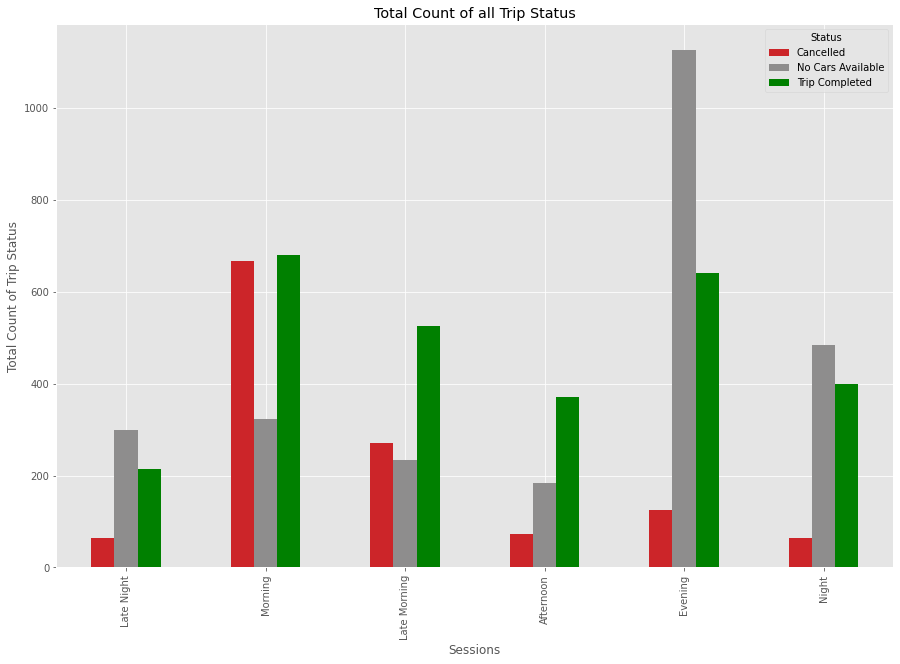

In [24]:
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
data.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total Count of all Trip Status')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()


In [25]:
cancelled_trips = data[data['Status'] == 'Cancelled']
print(cancelled_trips.shape)

(1264, 4)


In [26]:
print(cancelled_trips.value_counts())


Pickup_point  Status     Request_timestamp    session     
City          Cancelled  2016-11-07 07:33:00  Morning         4
                         2016-11-07 10:04:00  Late Morning    3
                         2016-12-07 06:41:00  Morning         3
                         2016-12-07 10:04:00  Late Morning    3
                         2016-11-07 04:58:00  Late Night      3
                                                             ..
                         2016-07-15 07:47:32  Morning         1
                         2016-07-15 07:47:23  Morning         1
                         2016-07-15 07:44:55  Morning         1
                         2016-07-15 07:44:45  Morning         1
Airport       Cancelled  2016-07-13 04:45:54  Late Night      1
Length: 1179, dtype: int64


In [27]:
no_cars_available = data[data['Status'] == 'No Cars Available']
print(no_cars_available.shape)

(2650, 4)


In [28]:
print(no_cars_available.value_counts())


Pickup_point  Status             Request_timestamp    session   
Airport       No Cars Available  2016-11-07 19:02:00  Evening       6
                                 2016-12-07 20:10:00  Evening       4
                                 2016-11-07 20:47:00  Evening       4
                                 2016-12-07 21:42:00  Night         4
                                 2016-12-07 18:41:00  Evening       4
                                                                   ..
City          No Cars Available  2016-07-13 15:25:37  Afternoon     1
                                 2016-07-13 15:41:19  Afternoon     1
                                 2016-07-13 15:56:08  Afternoon     1
                                 2016-07-13 16:07:19  Afternoon     1
Airport       No Cars Available  2016-07-13 00:02:14  Late Night    1
Length: 2429, dtype: int64


In [29]:
completed_trips = data[data['Status'] == 'Trip Completed']
print(completed_trips.shape)

(2831, 4)


In [30]:
print(completed_trips.value_counts())


Pickup_point  Status          Request_timestamp    session     
Airport       Trip Completed  2016-11-07 22:00:00  Night           4
City          Trip Completed  2016-11-07 05:12:00  Morning         3
                              2016-12-07 05:16:00  Morning         3
                              2016-11-07 05:45:00  Morning         3
                              2016-12-07 09:40:00  Late Morning    3
                                                                  ..
                              2016-07-14 15:03:23  Afternoon       1
                              2016-07-14 14:54:16  Afternoon       1
                              2016-07-14 14:52:43  Afternoon       1
                              2016-07-14 14:50:07  Afternoon       1
Airport       Trip Completed  2016-07-13 00:06:34  Late Night      1
Length: 2696, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff9705566d0>,
 [Text(0.9148122117335421, 0.6108343615606322, 'CANCELLED'),
  Text(-0.8197978372292601, 0.7334381405914392, 'NO CARS AVAILABLE'),
  Text(0.27450168572516787, -1.0651989600699212, 'TRIP COMPLETED')],
 [Text(0.49898847912738653, 0.3331823790330721, '18.74%'),
  Text(-0.44716245667050547, 0.40005716759533044, '39.29%'),
  Text(0.1497281922137279, -0.5810176145835932, '41.97%')])

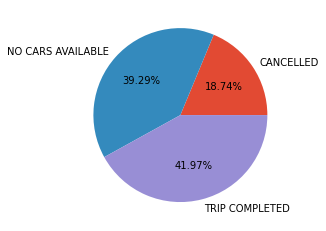

In [31]:
y = np.array([1264, 2650, 2831])
statuslabels = ["CANCELLED", "NO CARS AVAILABLE", "TRIP COMPLETED"]
plt.pie(y, labels = statuslabels, autopct = '%2.2f%%')

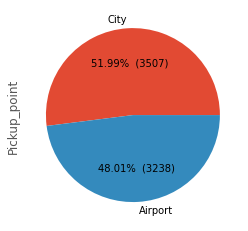

In [32]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

data['Pickup_point'].value_counts().plot.pie(autopct=make_autopct(data['Pickup_point'].value_counts()))
plt.show()

([<matplotlib.patches.Wedge at 0x7ff970266e90>,
 [Text(0.6587063113848798, 0.8809687822742223, 'Supply'),
  Text(-0.6587063113848801, -0.8809687822742219, 'Demand')],
 [Text(0.3592943516644798, 0.48052842669503026, '29.56%'),
  Text(-0.35929435166448004, -0.4805284266950301, '70.44%')])

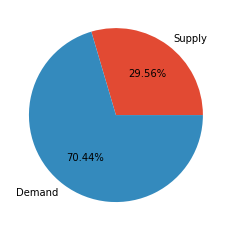

In [33]:
x = ["Supply", "Demand"]
y = np.array([2831, 6745])
plt.pie(y, labels = x, autopct = '%2.2f%%')

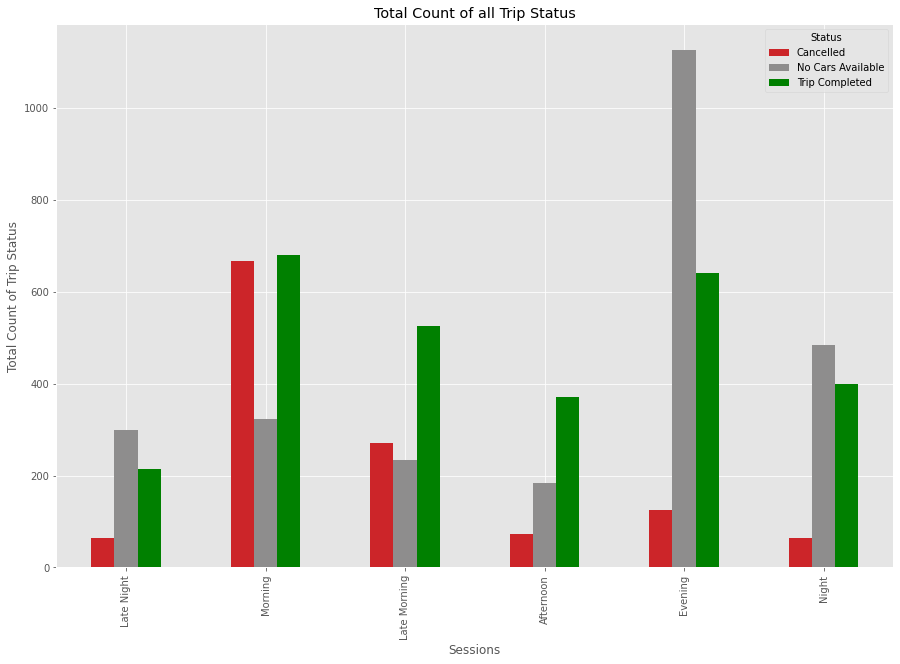

In [35]:
# plotting share/frequency of all "Trip Status" over the day to identify problem areas
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
data.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total Count of all Trip Status')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()

##Observations:##
####1. Maximum number of "No Cars Available" status trips can be seen in Evening Session (Time Slot: 4PM to 8PM), followed by Night session (8PM to Midnight).####
####2. Maximum number of "Cancelled" status trips can be seen in Early Morning Session (Time Slot: 4AM to 8AM), followed by Late Morning session (8AM to Noon).####
####3. Let's drill down further in each category to do a deeper analysis.####


In [37]:
data_tripscancelled=data[data["Status"].str.contains('Cancelled')==True]
data_tripscancelled=data_tripscancelled.reset_index(drop=True)
data_tripscancelled.head()

,Pickup_point,Status,Request_timestamp,session
0,City,Cancelled,2016-07-13 06:08:41,Morning
1,City,Cancelled,2016-07-14 17:07:58,Evening
2,Airport,Cancelled,2016-07-14 20:51:37,Evening
3,City,Cancelled,2016-07-15 10:12:40,Late Morning
4,Airport,Cancelled,2016-12-07 19:14:00,Evening


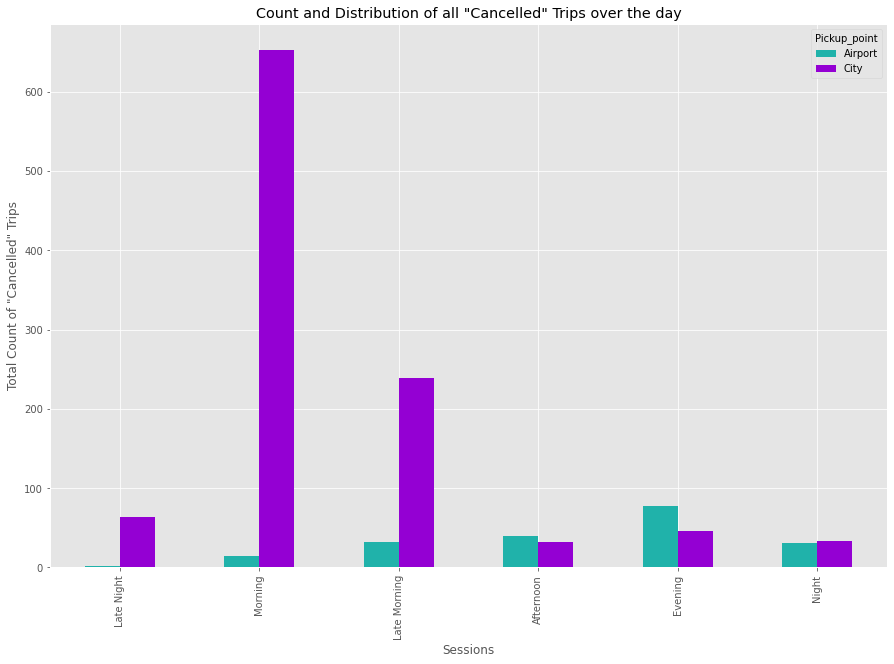

In [38]:
plt.style.use('ggplot')
colors = ["#20B2AA", "#9400D3"]
data_tripscancelled.groupby(['session','Pickup_point']).Pickup_point.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "Cancelled" Trips')
plt.show()

#Observation :#
####**Maximum Cancellations happen in "Early Morning" (4AM-8AM) session where the pick up is "City", followed by Late Morning session (8AM-Noon)**####

#Inference:#
####**Most number of cancellations happen in the Morning hours (4AM-8AM) in the City to Airport route.**####


In [39]:
# Filtering out only "Cancelled"  trips
data_nocar=data[data["Status"].str.contains('No Car')==True]
data_nocar=data_nocar.reset_index(drop=True)
data_nocar.head()

,Pickup_point,Status,Request_timestamp,session
0,City,No Cars Available,2016-11-07 00:02:00,Late Night
1,City,No Cars Available,2016-11-07 00:06:00,Late Night
2,City,No Cars Available,2016-11-07 00:09:00,Late Night
3,Airport,No Cars Available,2016-11-07 00:23:00,Late Night
4,Airport,No Cars Available,2016-11-07 00:30:00,Late Night


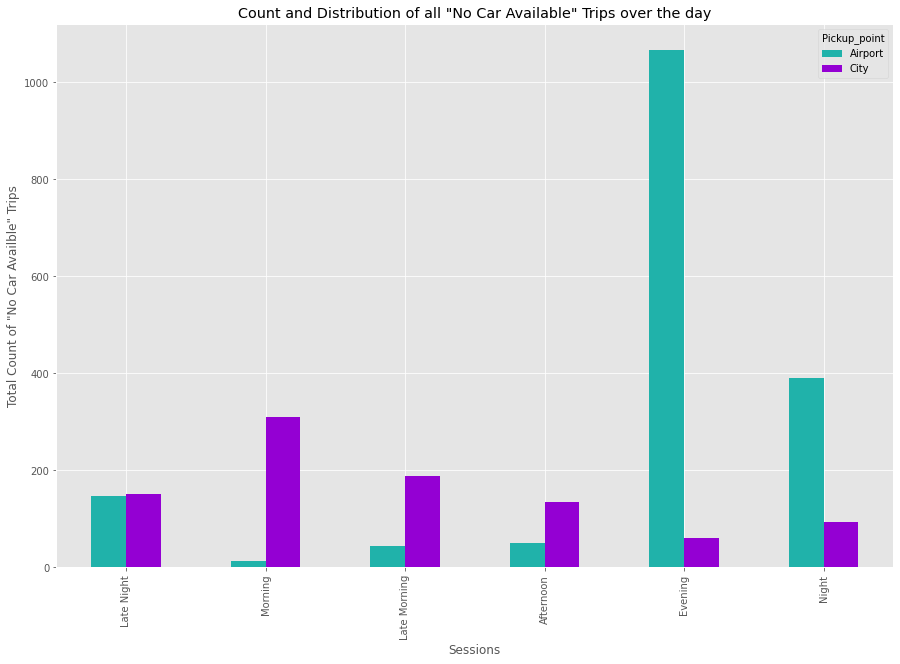

In [40]:
plt.style.use('ggplot')
colors = ["#20B2AA", "#9400D3"]
data_nocar.groupby(['session','Pickup_point']).Pickup_point.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "No Car Available" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "No Car Availble" Trips')
plt.show()

#Observation :#
####**1. Maximum "No Cars Available" trips happen in "Evening" (4PM-8PM) session where the pick up is "Airport", followed by Night session (8PM-Midnight)**####

#Inference :#
####**2.Most number of No Cars Available happen in the Evening Hours (4PM-8PM) in the Airport to City route.####**





##**Let's drill down further by Pick-Up Point .**##

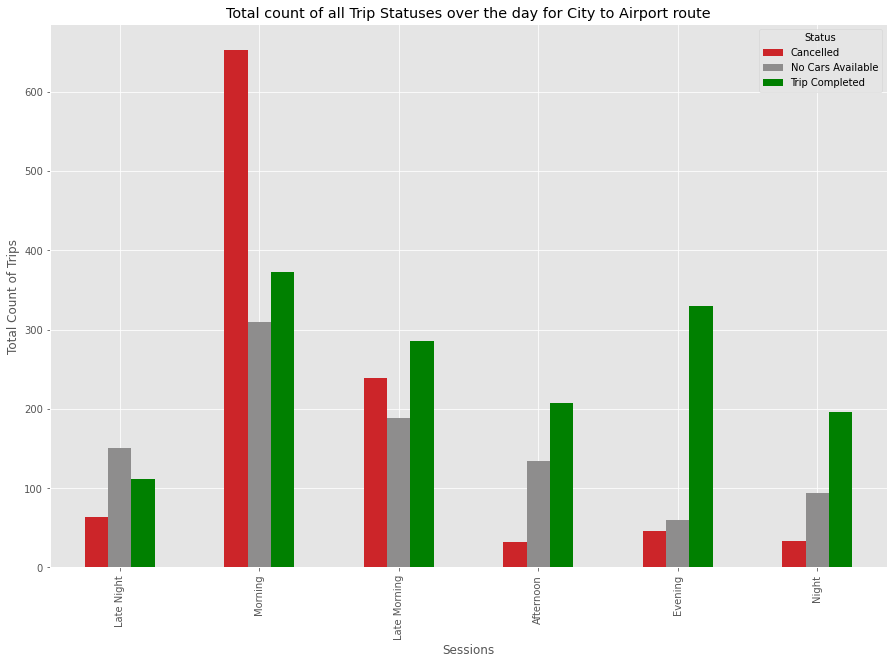

In [41]:
# Filtering out trips in the City to Airport route. Pick-up Point - City
data_citytoairport=data[data["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
data_citytoairport.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

####**We see that maximum trips cancelled are from City to airport in the Early Morning session followed by Late Morning Session.**####

In [46]:
data["Supply_demand"] = ["supply" if x == "Trip Completed" else "Demand" for x in data["Status"]]
data.head()

,Pickup_point,Status,Request_timestamp,session,Supply_demand
0,Airport,Trip Completed,2016-11-07 11:51:00,Late Morning,supply
1,Airport,Trip Completed,2016-11-07 17:57:00,Evening,supply
2,City,Trip Completed,2016-12-07 09:17:00,Late Morning,supply
3,Airport,Trip Completed,2016-12-07 21:08:00,Night,supply
4,City,Trip Completed,2016-07-13 08:33:16,Morning,supply


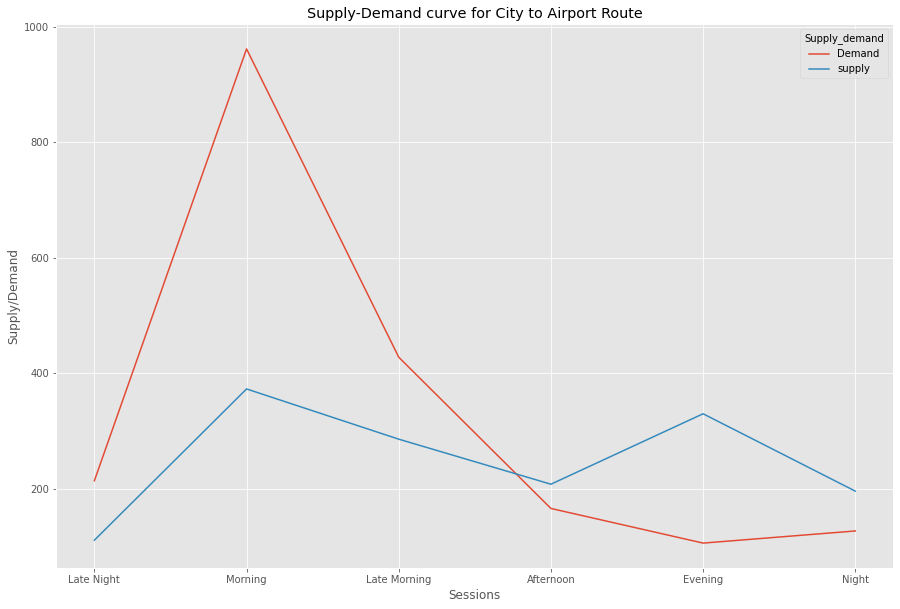

In [47]:
#Plotting Supply and Demand on the City to Airport Route
data_city_to_airport_supply_demand=data[data["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
data_city_to_airport_supply_demand.groupby(['session','Supply_demand']).Supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

**We observe that the Demand is very high in the morning from City to Airport route but the supply is very low .**


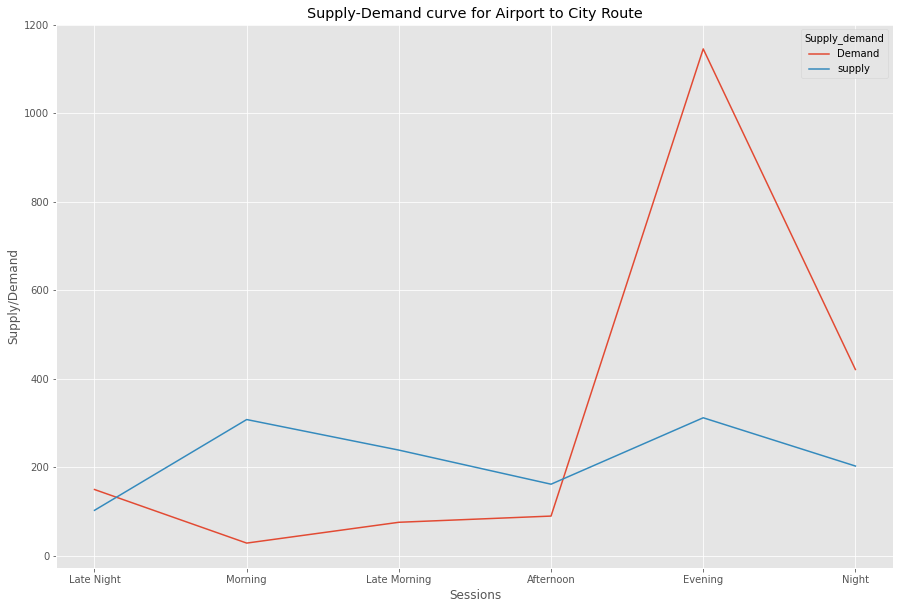

In [49]:
#Plotting Supply and Demand on the Airport to City route
data_airport_to_city_supply_demand=data[data["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
data_airport_to_city_supply_demand.groupby(['session','Supply_demand']).Supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

**We observe that the Demand is very high in the evening in the Airport to City route but the supply is very low**


##*Correlating these two plots, a possible hypothesis could be:*##


The demand during morning and afternoon hours from the Airport to City is quite low, which means that a driver who completed a City to Airport route in the morning hours may have to wait a really long time to get a ride back to the City, or he may have to come back without a passenger. Both situations are not idle for drivers, which might be the reason for highest number of "Cancelled" trips in the City to Airport trip in the morning hours The vice versa happens in evening when there are too many flight coming in to the airport and hence there is a high demand for cabs and not enough supply. which is why most number of "No Cars Available" were observed in Evening in the Airport to City route.

#**Possible Solution:**#

1.Give incentives/surge pricing/bonus for trips from City to Airport during Morning hours. 

2.Give incentives/surge pricing/bonus for trips from Airport to City during 
Evening hours. 

3.Uber can give Gas expense to drivers qwhen they return from Airport without a ride or go to airpot for pick up without a ride. 

4.Give incentives/surge pricing/bonus for trips from City to Airport during Morning hours. 

5.Give incentives/surge pricing/bonus for trips from Airport to City during Evening hours. 

6.Uber can give Gas expense to drivers qwhen they return from Airport without a ride or go to airpot for pick up without a ride. 

7.Uber can increase market share by marketing campaigns and offers to customers when demand is low.